# Mediciones código paralelo

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

## SpeedUp

In [3]:
from matplotlib.patches import Rectangle
from matplotlib.offsetbox import AnchoredText

def plot_times(n_threades, time_seg, panel_num, total_steps):
    
    # Función para ajustar los tiempos
    def func_time(x, a):
        return a/x
    
    # Función para ajustar el speed up
    def func_speed(x, a, b):
        return a*x + b
    
    # time in min
    time_min = time_seg/60
    time_theory = time_min[0]*n_threades[0]/n_threades

    # speed up
    speed_up = time_seg[0]*n_threades[0]/time_seg
    speed_theory = n_threades
    
    # Curve fit
    popt_time, pcov_time = curve_fit(func_time, n_threades, time_min)
    popt_speed, pcov_speed = curve_fit(func_speed, n_threades, speed_up)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

    # Times plot
    axes[0].plot(n_threades, time_min, 'b-o', label=r'$Medido$')
    axes[0].plot(n_threades, time_theory, 'r-s', label=r'$Teorico$')
    axes[0].plot(n_threades, func_time(n_threades, popt_time[0]), 'g--', lw=3, label=r'$Ajuste$')
    axes[0].legend(loc=1, fontsize=10)
    axes[0].set_xlabel(r'$Numero\;\;\; threades$', fontsize=15)
    axes[0].set_ylabel(r'$Tiempo\;\;\; minutos$', fontsize=15)
    axes[0].set_title(r'$Tiempos\;\;\; Paralelizacion\;\;\; OpenMP$', fontsize=15)
    axes[0].set_xlim([n_threades[0] - 1, n_threades[-1] + 1])
    axes[0].set_xticks(n_threades)
    
    
    text_x = (n_threades[-1]/2.5)*1.8
    text_y = time_min[0]/5 * 4
    step_y = time_min[0]/10
    anchored_text = AnchoredText("Ajuste a/x \na = {0:.3f}".format(popt_time[0]), loc=3)
    axes[0].add_artist(anchored_text)
    max_point = max(max(time_min), max(time_theory), max(func_time(n_threades, popt_time[0])))
    text_y = max_point/7*5
    step_y = time_min[0]/6
    #axes[0].text(16, 400, 'Ajuste a/x \n a = {0:.3f}'.format(popt_time[0]), color='blue', bbox=dict(facecolor='none', edgecolor='blue', pad=3.0))
    axes[0].grid(True)
    
    # Speed up plots
    axes[1].plot(n_threades, speed_up, 'b-o', label=r'$Medido$')
    axes[1].plot(n_threades, speed_theory, 'r-s', label=r'$Teorico$')
    axes[1].plot(n_threades, func_speed(n_threades, popt_speed[0], popt_speed[1]), 'g--', lw=3, label=r'$Ajuste$')
    axes[1].legend(loc=2, fontsize=10)
    axes[1].set_xlabel(r'$Numero\;\;\; threades$', fontsize=15)
    axes[1].set_ylabel(r'$Speed\;\;\; Up$', fontsize=15)
    axes[1].set_title(r'$SpeedUp\;\;\; Paralelizacion\;\;\; OpenMP$', fontsize=15)
    
    min_y = min(min(speed_theory), min(speed_up)) - 1
    max_y = max(max(speed_theory), max(speed_up)) + 1
    axes[1].set_xlim([n_threades[0] - 1, n_threades[-1] + 1])
    axes[1].set_ylim([min_y, max_y])
    axes[1].set_xticks(n_threades)
    axes[1].set_yticks(n_threades)
    
    text_y = n_threades[-1]/7 * 5
    
    anchored_text = AnchoredText("Ajuste a*x + b\na = {0:.3f}\nb = {1:.3f}".format(popt_speed[0],
                                                                                     popt_speed[1]), loc=4)
    axes[1].add_artist(anchored_text)

    axes[1].grid(True)

    title = "Cantidad de Paneles: {0}, Cantidad de avances temporales: {1}".format(panel_num, total_steps)
    fig.suptitle(title, y=1.05, fontsize=15)
    #fig.subplots_adjust(hspace=100)

    plt.show()

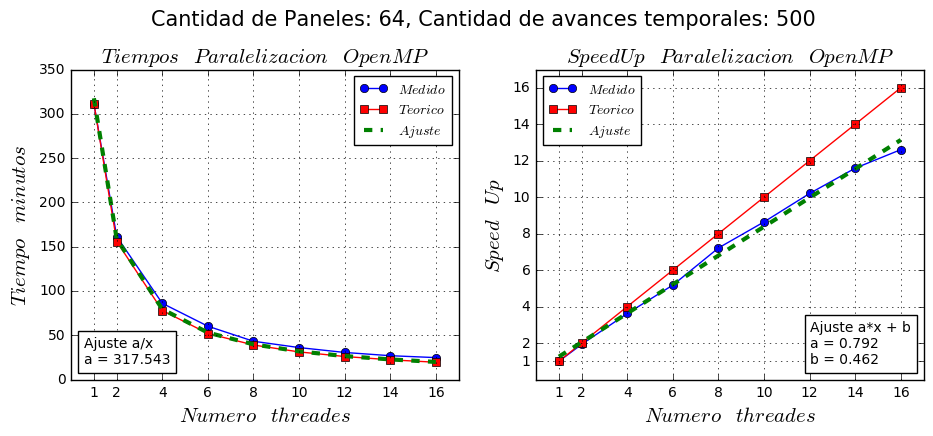

In [3]:
panel_num = 64
total_steps = 500

n_threades = np.array([1, 2, 4, 6, 8, 10, 12, 14, 16])
time_seg= np.array([18694, 9683, 5160, 3610, 2591, 2163, 1832, 1613, 1483])

plot_times(n_threades, time_seg, panel_num, total_steps)

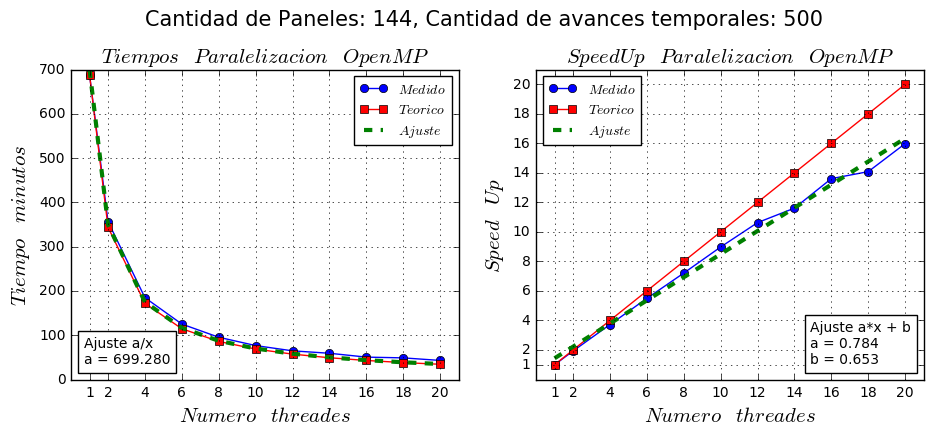

In [4]:
panel_num = 144
total_steps = 500

n_threades = np.array([1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
time_seg= np.array([41259, 21392, 11088, 7510, 5724, 4597, 3882, 3554, 3032, 2930, 2582])

plot_times(n_threades, time_seg, panel_num, total_steps)

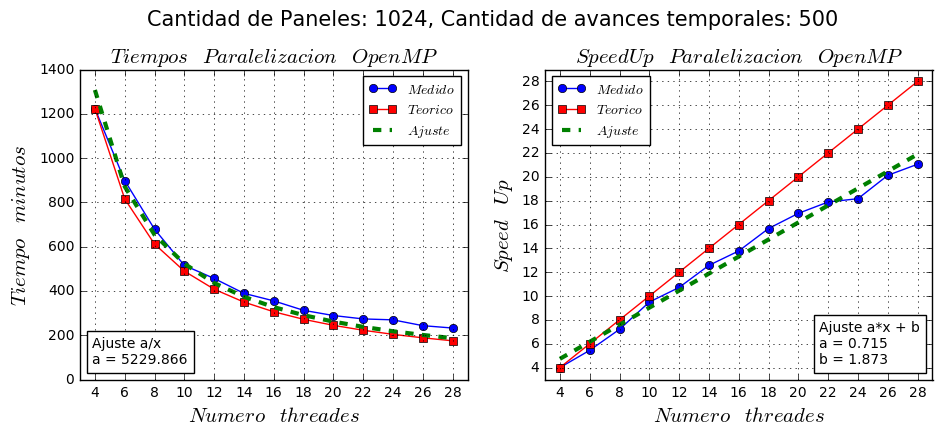

In [5]:
panel_num = 1024
total_steps = 500

n_threades = np.array([4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])
time_seg= np.array([73404, 53902, 40726, 30921, 27382, 23350, 21305, 18746, 17337, 16413, 16163, 14589, 13945])

plot_times(n_threades, time_seg, panel_num, total_steps)

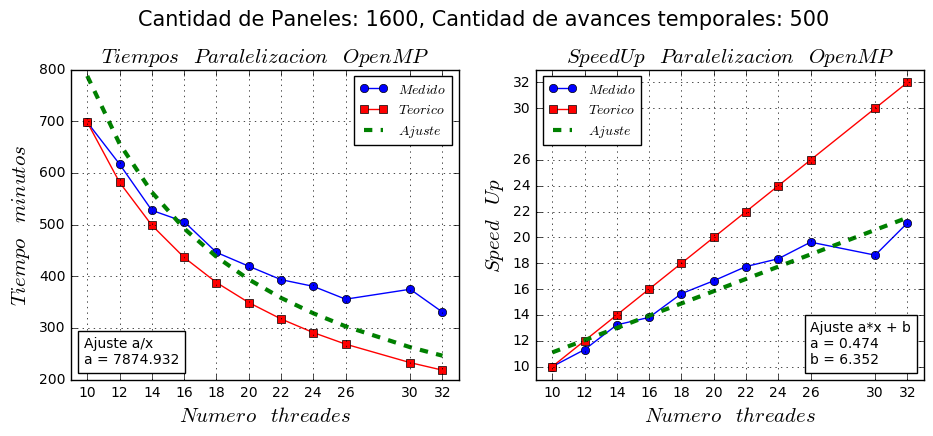

In [11]:
panel_num = 1600
total_steps = 500

n_threades = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 30, 32])
time_seg= np.array([41873, 37011, 31643, 30324, 26760, 25158, 23597, 22819, 21327, 22480, 19823])

plot_times(n_threades, time_seg, panel_num, total_steps)

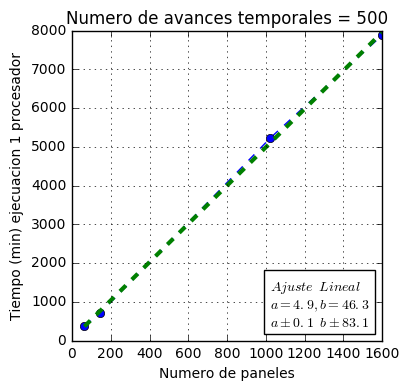

In [12]:
n_panels = np.array([64, 144, 1024, 1600])
tiempo = np.array([371, 699, 5229, 7874])
x = np.linspace(min(n_panels), max(n_panels))

def lineal(x, a, b):
    return a*x + b

def aX(x, a):
    return a*x


# Curve fit
popt, pcov = curve_fit(lineal, n_panels, tiempo)
# Error in curve fit
perr = np.sqrt(np.diag(pcov))

# Text de ajuste
text = r"$Ajuste\;\; Lineal$" + "\n" + r"$a = {0:.1f}, b = {1:.1f}$" +\
       "\n" + r"$a \pm {2:.1f}\;\; b \pm {3:.1f}$"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.plot(n_panels, tiempo, '--o', label=r'$Datos\; medidos$')
axes.plot(x, lineal(x, popt[0], popt[1]), 'g--', lw=3, label=r'$Ajuste\; sqrt$')
anchored_text = AnchoredText(text.format(popt[0], popt[1], perr[0], perr[1]), loc=4)
axes.add_artist(anchored_text)
axes.set_xlabel('Numero de paneles')
axes.set_ylabel('Tiempo (min) ejecuacion 1 procesador')
axes.set_title('Numero de avances temporales = 500')
axes.grid(True)

## Tamaño de la salida

Medimos el tamaño total del directory de salida.

<function matplotlib.pyplot.show>

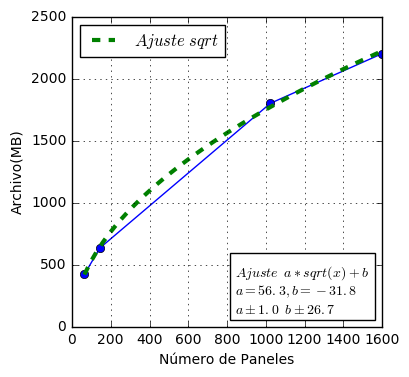

In [37]:
n_panels = np.array([64, 144, 1024, 1600])
# size of WakeEvolution in Mb
size = np.array([421, 633, 1800, 2200])

# Función para ajustar los tiempos
def fun_sqrt(x, a, b):
    return a*np.sqrt(x) + b

# Text de ajuste
text = r"$Ajuste\;\; a*sqrt(x) + b$" + "\n" + r"$a = {0:.1f}, b = {1:.1f}$" +\
       "\n" + r"$a \pm {2:.1f}\;\; b \pm {3:.1f}$"

# Curve fit
popt, pcov = curve_fit(fun_sqrt, n_panels, size)
# Error in curve fit
perr = np.sqrt(np.diag(pcov))

x = np.linspace(min(n_panels), max(n_panels))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.plot(n_panels, size, '-o')
axes.plot(x, fun_sqrt(x, popt[0], popt[1]), 'g--', lw=3, label=r'$Ajuste\; sqrt$')

anchored_text = AnchoredText(text.format(popt[0], popt[1], perr[0], perr[1]), loc=4)
axes.add_artist(anchored_text)

axes.set_xlabel("Número de Paneles")
axes.set_ylabel("Archivo(MB)")
axes.legend(loc=2, fontsize=12)
axes.grid(True)
plt.show